<a href="https://colab.research.google.com/github/preetikhullbe/Hotel-Booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Objective**
# This project contains the real world data record of hotel bookings of a city and a resort hotel containing details like bookings, cancellations, guest details etc. from 2015 to 2017. Main aim of the project is to understand and visualize dataset from hotel and customer point of view i.e.

# reasons for booking cancellations across various parameters
# best time to book hotel
# peak season
# and give suggestions to reduce these cancellations and increase revenue of hotels

In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Dataset extraction
df=pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')

# Exloring Dataset

In [4]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# **DATA SUMMARY**

***hotel:***The category of hotels,which are two resort hotel and city hotel.


 **is_canceled:**  The value of column show the cancellation type.If the booking was cancelled or not .values[0,1] where 1 indicates cancelled and 0 indicates not cancelled.


**lead_time:**The time between reservation and actual arriaval.


**arrival_date_year:**Year of arriavl of guest.


**arrival_date_month:** MOnth of arrival.


**arrival_date_week_number:**Date of arrival.


**stayed_in_weekend_nights:**The number of weekend nights stay per reservation


**stayed_in weekday_nights:**The number of weekday nights stay per reservation


**meal:**Meal preferences per reservation [BB,FB,HB,SC,Undefined]


**Country:**The origin country of guest.


**market_segment:** This column show how reservation was made and what is the purpose of resevation.E.g. corporate means corporate trip,TA for travel Agency.


**distribution_channel:**The medium through booking was made[Direct,Corporate,TA/TO,Undefined,GDS].


**Is_repeated_guest:**SHows if the guest is who has arrived earlier or not .values[0,1].0 means no and 1 means yes person is repeated guest.


**days_in_waiting_list**:Number of days between actual booking and transact.


**customer_type:**Type of customers [Transient,group,etc] 



In [6]:
df.shape

(119390, 32)

In [7]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# Data Preparation and Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# To start with the very basic of data cleaning, let's find out if any of the columns have any Null or missing values and replace those with integers.

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
#creation of a Function for Null values Information 
def hotel_df():
  hotel_booking_df = pd.DataFrame(index=df.columns)
  hotel_booking_df['Datatypes'] =  df.dtypes
  hotel_booking_df['Count of non-null values'] = df.count()
  hotel_booking_df['NaN values'] = df.isnull().sum()
  hotel_booking_df['% NaN Values'] = (hotel_booking_df['NaN values']/len(df)).round(4)*100 
  hotel_booking_df['Unique_count'] = df.nunique()
  return hotel_booking_df
hotel_df()

,Datatypes,Count of non-null values,NaN values,% NaN Values,Unique_count
hotel,object,119390,0,0.00,2
is_canceled,int64,119390,0,0.00,2
lead_time,int64,119390,0,0.00,479
arrival_date_year,int64,119390,0,0.00,3
arrival_date_month,object,119390,0,0.00,12
arrival_date_week_number,int64,119390,0,0.00,53
arrival_date_day_of_month,int64,119390,0,0.00,31
stays_in_weekend_nights,int64,119390,0,0.00,17
stays_in_week_nights,int64,119390,0,0.00,35
adults,int64,119390,0,0.00,14


# So in our Dataset most of null values are in three columns country,agent and company and 4 nan value in children column

firstly let  explore children column

In [11]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

so most of the values are 0 so we can replace null values by 0 in this column

In [12]:
df['children'].fillna(0,inplace=True)
#converting into int
df['children'] = df['children'].astype(int)

next lets see country!we have 488 null values in it


In [13]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [14]:
df['country'].fillna('XYZ',inplace=True)

company has 94% nan values which is most of the data so we can't deal with the incomplete data ,so it's better to drop this out 

In [15]:
df=df.drop(['company'],axis=1)

**agent** column have 13% null values in it


In [16]:
df['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [17]:
#dropping all the nan values from dataset
df=df.dropna()

In [18]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Now the dataframe 'df' has no missing values.

In [19]:
df.duplicated()

3         False
4         False
5          True
7         False
8         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 103050, dtype: bool

so we don't have any duplicates in our data.
our data cleaning is completed 


# Removing columns which are not required for analysis and clubbing others.

In [20]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
selected_columns= ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']

In [22]:
# Creating a copy so as not to disturb original dataset.
bookings_df = df[selected_columns].copy()

In [23]:
# dropping babies column as they are not accounted into monetary aspects.
bookings_df['Total_Guests'] = bookings_df['adults'] + bookings_df['children']

In [24]:
#now dropping unnecessary columns
bookings_df = bookings_df.drop(['adults', 'children'], axis=1)

In [25]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,0,A,A,No Deposit,Transient,75.0,0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,0,A,A,No Deposit,Transient,98.0,0,1,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,FB,...,0,0,C,C,No Deposit,Transient,103.0,0,1,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,BB,...,0,0,A,A,No Deposit,Transient,82.0,0,1,2


In [26]:
# removing rows which contain total guests as Zero.
bookings_df= bookings_df[bookings_df.Total_Guests > 0]

In [27]:
bookings_df.shape

(102930, 24)

In [28]:
bookings_df.describe(include="all")

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
count,102930,102930.000000,102930.000000,102930.000000,102930,102930.000000,102930.000000,102930.000000,102930.000000,102930,...,102930.000000,102930.000000,102930,102930,102930,102930,102930.000000,102930.000000,102930.000000,102930.000000
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,5,...,NaN,NaN,8,10,3,4,NaN,NaN,NaN,NaN
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,BB,...,NaN,NaN,A,A,No Deposit,Transient,NaN,NaN,NaN,NaN
freq,71083,NaN,NaN,NaN,12675,NaN,NaN,NaN,NaN,77727,...,NaN,NaN,73309,64559,90346,77793,NaN,NaN,NaN,NaN
mean,NaN,0.390401,111.741416,2016.156407,NaN,27.337764,15.785029,0.977451,2.588740,NaN,...,0.077247,0.024755,NaN,NaN,NaN,NaN,104.722843,0.053250,0.605382,2.012951
std,NaN,0.487843,107.677711,0.706272,NaN,13.280884,8.793898,1.001426,1.897826,NaN,...,0.758061,0.436073,NaN,NaN,NaN,NaN,49.954165,0.225784,0.799240,0.642198
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,-6.380000,0.000000,0.000000,1.000000
25%,NaN,0.000000,26.000000,2016.000000,NaN,17.000000,8.000000,0.000000,1.000000,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,73.000000,0.000000,0.000000,2.000000
50%,NaN,0.000000,79.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,96.300000,0.000000,0.000000,2.000000
75%,NaN,1.000000,169.000000,2017.000000,NaN,38.000000,24.000000,2.000000,3.000000,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,127.800000,0.000000,1.000000,2.000000


# **Exploratory Analysis and Visualization**

# We will try to answer the following question:

1.which agent made most of bookings?

2.How many Booking were cancelled?

3.Which room type is in most demand and which room type  generates highest adr?

4.From which country most of the customers are coming?

5.What is the most preferred meal by customers?

6.Percentage of booking in each hotel?

7.Which Hotel make more revennue?

8.Which hotel has more lead time?

9.What is most preferred stay length in each hotel?

10.For which hotel ,does peoploe ahve to wait longer to get a booking confirmed?

11.Which Hotel has higher booking cancellation rate?

12.Which hotel have higher and how much customer returning rate?

13.Which is most common channel for booking hotels?

14.Which channel is mostly used for early booking of hotels?

15.which distribution channel brings better revenue generating deals for hotels?

16.which significant distribution channel has highest cancellation percentage?

17.how much customers are not getting same room as reserved?

18.What are the most busy months for hotels?

19.In which months hotels charges higher adr?

20.What are the different reason for special requests?

21.How adr(average daily rate) is affected by total staying period in hotels? 



# 1.Which type of hotel have more Bookings(Percentage of booking in each hotel)

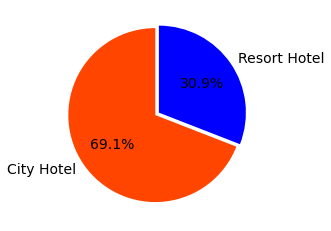

In [29]:
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['orangered', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

# 2. From where the most guests are coming ?

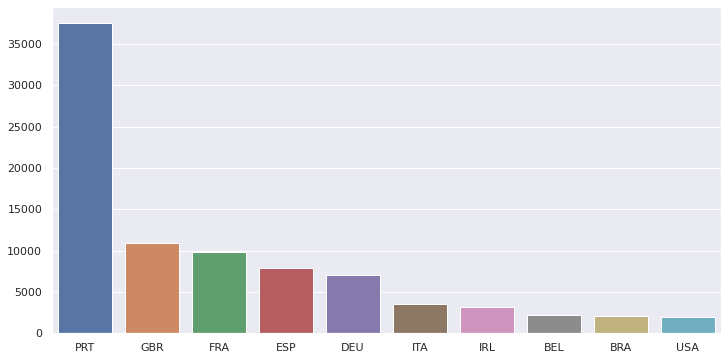

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))

# More visitors are from western europe, namely Portugal,France, Great Britain, and Spain being the highest.

# 1. Visualizing Hotel wise yearly bookings

Text(0.5, 1.0, 'yearly bookings')

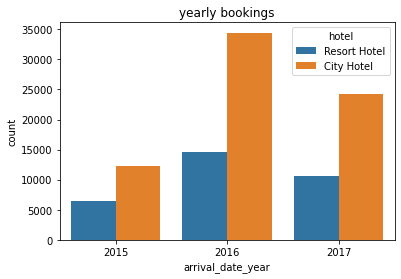

In [31]:
sns.countplot (x= 'arrival_date_year', data= bookings_df, hue= 'hotel').set_title ('yearly bookings')

#  Bookings across years is higher for city hotel compared to resort hotel and donot increase proportionately over the years.

#3. Visualizing proportion of booking cancellations vis a vis bookings

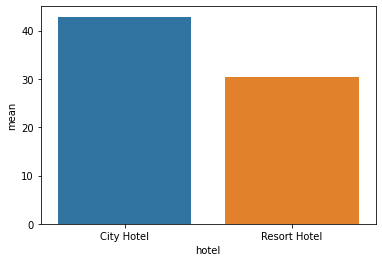

In [32]:
a = bookings_df.groupby("hotel")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

# City hotels have the highest cancellation rates, this can be verified by the fact that city hotels have higher booking rate than resort hotels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


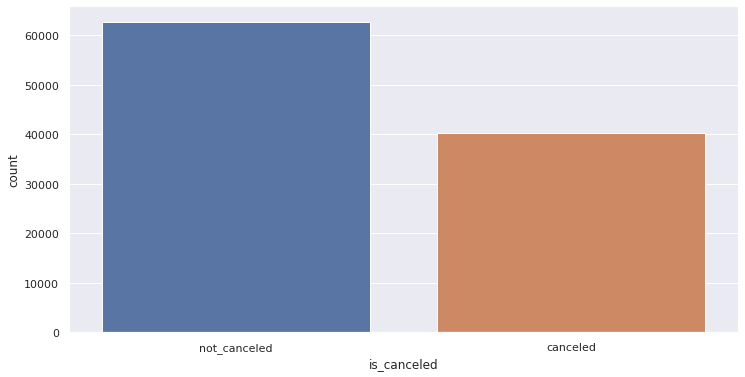

In [85]:
bookings_df['is_canceled'] = bookings_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data =bookings_df['is_canceled']
plt.figure(figsize=(12, 6))
sns.countplot(canceled_data)

# Majority(2/3rd's) of the hotel bookings are not canceled

In [64]:
bookings_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests,adr_pp
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,A,A,No Deposit,Transient,75.0,0,0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,A,A,No Deposit,Transient,98.0,0,1,2,49.0
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,A,A,No Deposit,Transient,98.0,0,1,2,49.0
7,Resort Hotel,0,9,2015,July,27,1,0,2,FB,...,0,C,C,No Deposit,Transient,103.0,0,1,2,51.5
8,Resort Hotel,1,85,2015,July,27,1,0,3,BB,...,0,A,A,No Deposit,Transient,82.0,0,1,2,41.0


# Guest arrival date 

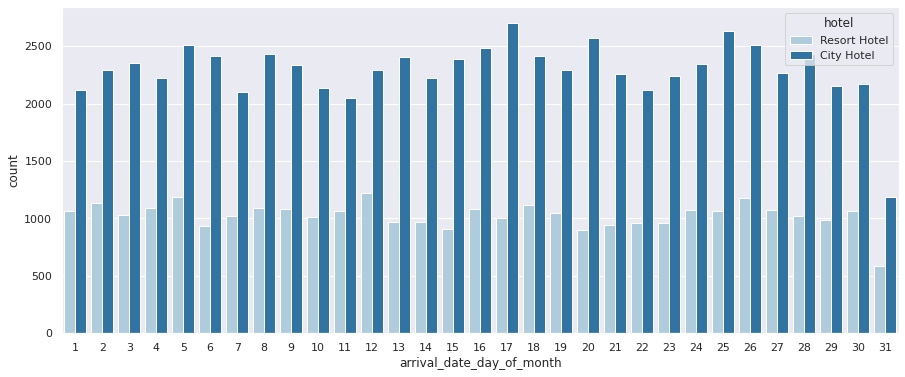

In [68]:
plt.figure(figsize=(15,6))

sns.countplot(data = bookings_df, x = 'arrival_date_day_of_month',hue='hotel',  palette='Paired')
plt.show()

# We can see that month ending has the least number of arrivals

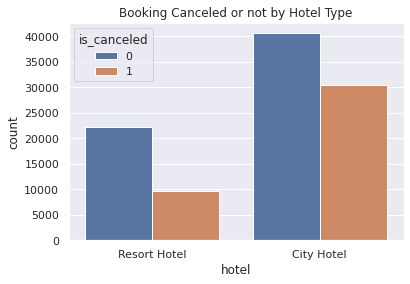

In [33]:
# another way of plotting same graph including hue as cancellation
sns.set(style = "darkgrid")
plt.title("Booking Canceled or not by Hotel Type")
ax = sns.countplot(x = "hotel", hue = 'is_canceled', data = bookings_df)

# Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

# 4. Visualizing monthly bookings and monthly cancellations

In [34]:
# taking different values of months count into account.
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,no_of_bookings
116116,City Hotel,0,78,2017,July,28,10,1,4,2,...,No Deposit,9.0,0,Transient,150.00,0,1,Check-Out,2017-07-15,0.333333
51562,City Hotel,1,55,2016,May,21,21,2,1,2,...,No Deposit,9.0,0,Transient,116.10,0,0,Canceled,2016-03-29,0.500000
78986,City Hotel,0,221,2015,October,42,17,2,1,3,...,No Deposit,3.0,0,Transient-Party,90.00,0,0,Check-Out,2015-10-20,0.500000
47092,City Hotel,0,45,2016,February,6,6,2,2,1,...,No Deposit,11.0,0,Transient,46.90,0,1,Check-Out,2016-02-10,0.500000
106469,City Hotel,0,134,2017,February,8,25,0,1,1,...,No Deposit,30.0,0,Transient-Party,75.00,0,0,Check-Out,2017-02-26,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66273,City Hotel,1,128,2017,April,16,16,2,1,2,...,Non Refund,58.0,0,Transient,100.00,0,0,Canceled,2016-12-09,0.500000
55025,City Hotel,1,91,2016,August,32,3,0,1,2,...,No Deposit,9.0,0,Transient,135.90,0,0,Canceled,2016-05-04,0.333333
60042,City Hotel,1,106,2016,November,45,4,1,2,2,...,No Deposit,9.0,0,Transient,124.20,0,0,Canceled,2016-07-21,0.500000
60433,City Hotel,1,300,2016,November,46,11,0,2,2,...,Non Refund,1.0,0,Transient,65.00,0,0,Canceled,2016-03-14,0.500000


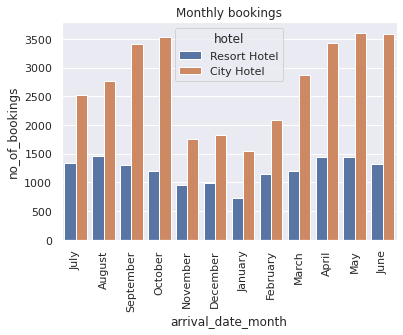

In [35]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()

#In case of city hotel, months with high bookings (May, June, September, October) also witnessed more cancellations. Guest numbers for the Resort hotel go down slighty from June to September though variations in bookings and cancellations are less in case of resort hotel. Both hotels have the fewest guests during the winter. 

# 5. Market segment wise bookings

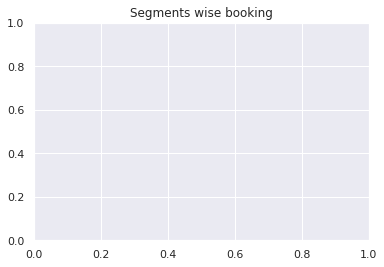

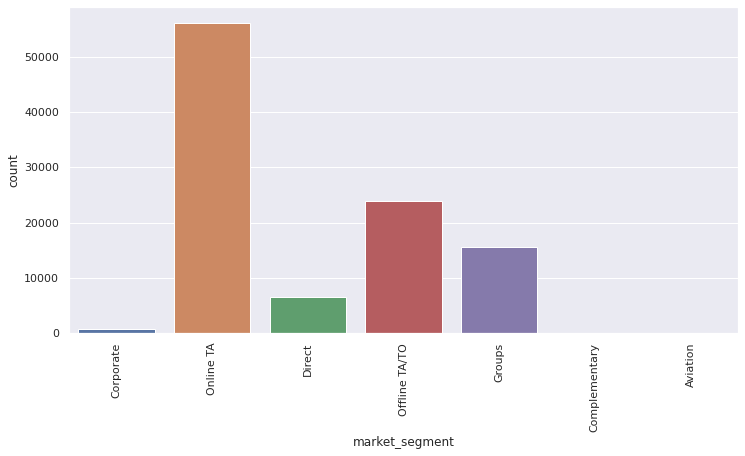

In [84]:
plt.title("Segments wise booking")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

# Indirect bookings through online and offline travel agents are higher compared to direct bookings and same is the case with group bookings which are also high.

#6. Plotting monthly cancellations and customer type

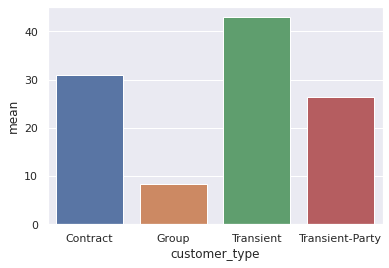

In [37]:
a = bookings_df.groupby("customer_type")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

# Transient customer types have higher cancellations.

#7. What is the relationship between lead time and cancellation? </span>

(array([13881.,  7835.,  6049.,  6149.,  4896.,  4647.,  4268.,  3810.,
         3717.,  3378.,  3152.,  3102.,  2563.,  2678.,  2387.,  2516.,
         2361.,  2273.,  2343.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <a list of 19 Patch objects>)

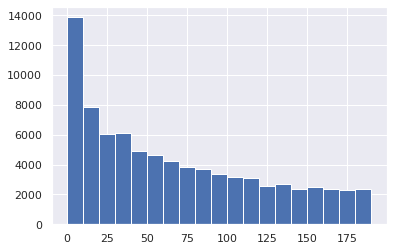

In [38]:
plt.hist (bookings_df.lead_time, bins= np.arange(0,200,10))

In [83]:
a = bookings_df.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

KeyError: ignored

# Lead time has a positive correlation with cancellation. 

# 8. What is the relationship between deposit type and cancellation? 

In [40]:
bookings_df[bookings_df.deposit_type== 'Refundable'].deposit_type.count()

48

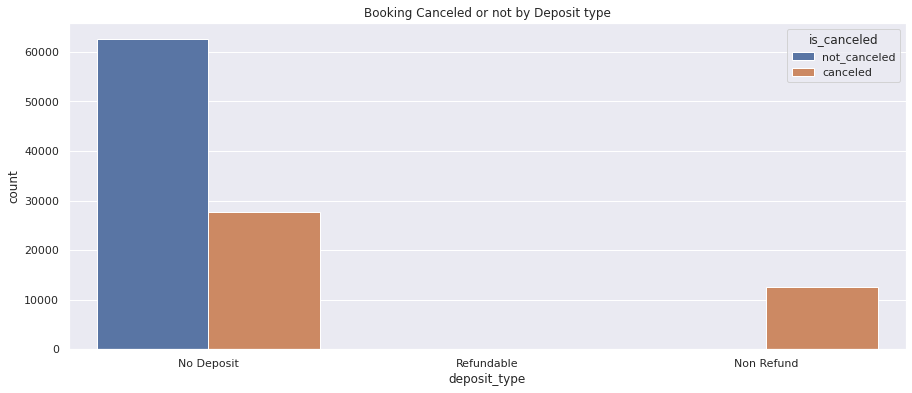

In [81]:
plt.figure(figsize=(15, 6))
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=bookings_df ,hue='is_canceled')

# Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.

# Types of deposite

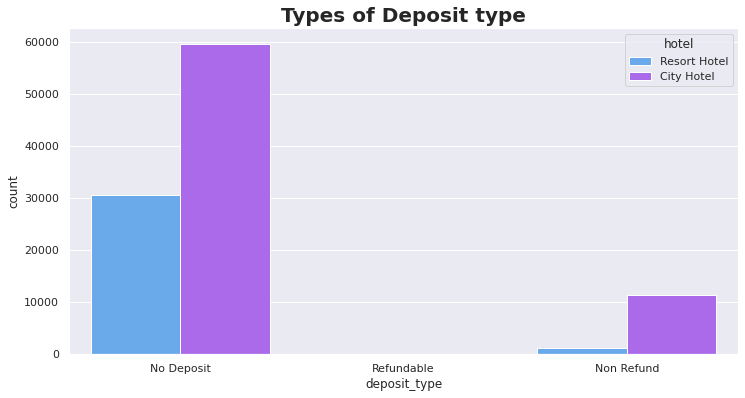

In [71]:
plt.figure(figsize=(12, 6))

sns.countplot(data = bookings_df, x = 'deposit_type',hue='hotel', palette='cool')
plt.title('Types of Deposit type',fontweight="bold", size=20)


plt.show()

# Majority of the bookings don't have a deposit towards it.

# 9. What is the relationship between market segment and cancellation? </span>

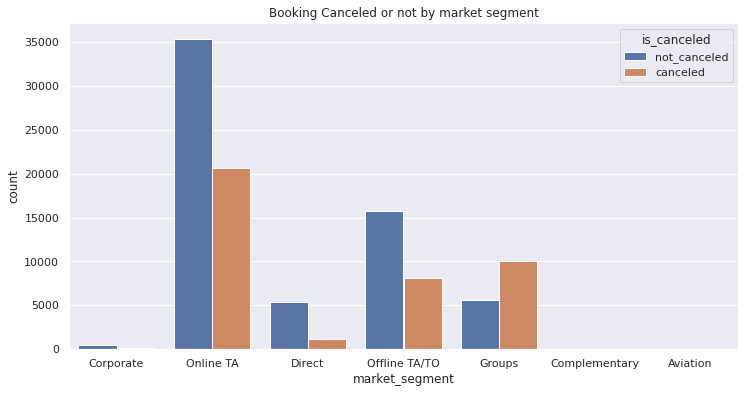

In [80]:
plt.figure(figsize=(12, 6))
plt.title("Booking Canceled or not by market segment")
sns.countplot(x='market_segment',data=bookings_df ,hue='is_canceled')

#  Groups segment has cancellation rate around 50%. Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. It is surprising that the cancellation rate in these segments is high despite the application of a deposit. The fact that cancellations are made collectively like group reservations has high cancellation rate. It is interesting to note that direct segment has cancellation rate less than 20%.

# 10. What is the relationship between previous cancellations and cancellation? 

In [43]:
bookings_df[bookings_df.previous_cancellations==1].count()

hotel                             5394
is_canceled                       5394
lead_time                         5394
arrival_date_year                 5394
arrival_date_month                5394
arrival_date_week_number          5394
arrival_date_day_of_month         5394
stays_in_weekend_nights           5394
stays_in_week_nights              5394
meal                              5394
country                           5394
market_segment                    5394
distribution_channel              5394
is_repeated_guest                 5394
previous_cancellations            5394
previous_bookings_not_canceled    5394
reserved_room_type                5394
assigned_room_type                5394
deposit_type                      5394
customer_type                     5394
adr                               5394
required_car_parking_spaces       5394
total_of_special_requests         5394
Total_Guests                      5394
dtype: int64

In [44]:
bookings_df.previous_cancellations.unique()

array([ 0,  1,  2, 26, 25, 14,  3, 24, 21,  5, 13, 11,  6])

In [45]:
bookings_df.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_Guests
previous_cancellations,,,,,,,,,,,,,,,,,,,,,
0,97367,97367,97367,97367,97367,97367,97367,97367,97367,97367,...,97367,97367,97367,97367,97367,97367,97367,97367,97367,97367
1,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394,...,5394,5394,5394,5394,5394,5394,5394,5394,5394,5394
2,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
3,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
11,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
13,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
14,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


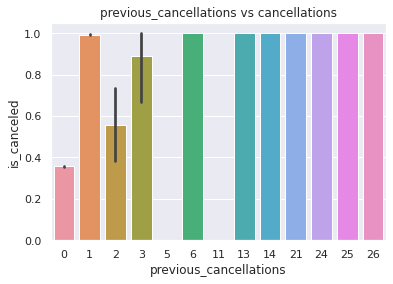

In [46]:
plt.title ('previous_cancellations vs cancellations')
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = bookings_df)

#  Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. For higher values of previous cancellations, numbers are very less and can be ignored.

# 11. How much does the price in hotels vary over the year?  </span>

In [49]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [50]:
bookings_df['adr_pp']= bookings_df.adr/bookings_df.Total_Guests
monthlyadr_df= bookings_df.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
monthlyadr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],monthlyadr_df.index)), "month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,57.756983
1,City Hotel,August,55.408723
2,City Hotel,December,47.990952
3,City Hotel,February,47.790629
4,City Hotel,January,49.221068
5,City Hotel,July,54.447410
6,City Hotel,June,66.791902
7,City Hotel,March,51.641687
8,City Hotel,May,67.402031
9,City Hotel,November,56.341137


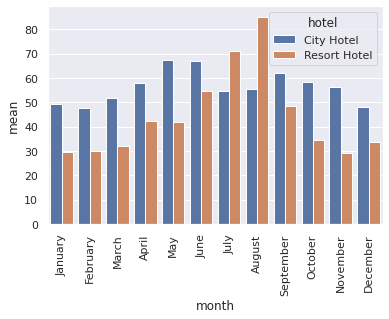

In [51]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y= 'mean', x= 'month', data= monthlyadr_df, hue= 'hotel', order= month_sorted)
plt.xticks(rotation = 90)
plt.show()

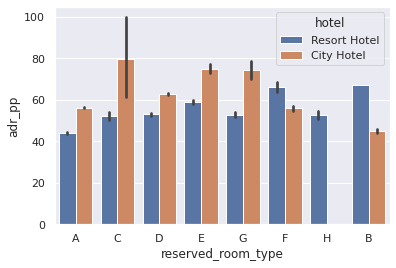

In [53]:
# plotting variation in adr with room type
sns.barplot(data = bookings_df, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')

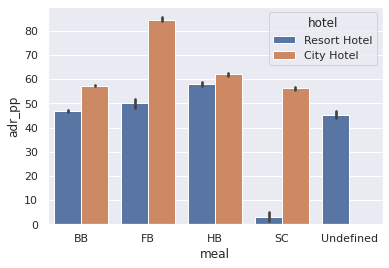

In [55]:
# plotting variation in adr with meal type
sns.barplot(data = bookings_df, x = 'meal', y = 'adr_pp', hue = 'hotel')

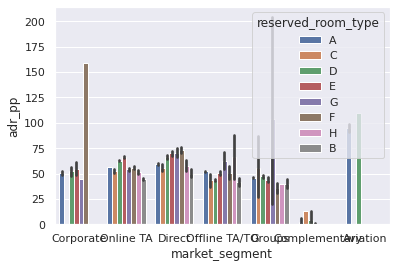

In [56]:
sns.barplot(x= 'market_segment', y= 'adr_pp', hue= 'reserved_room_type', data= bookings_df)

# This plot clearly shows that prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn  and these vary with room type and meal type.

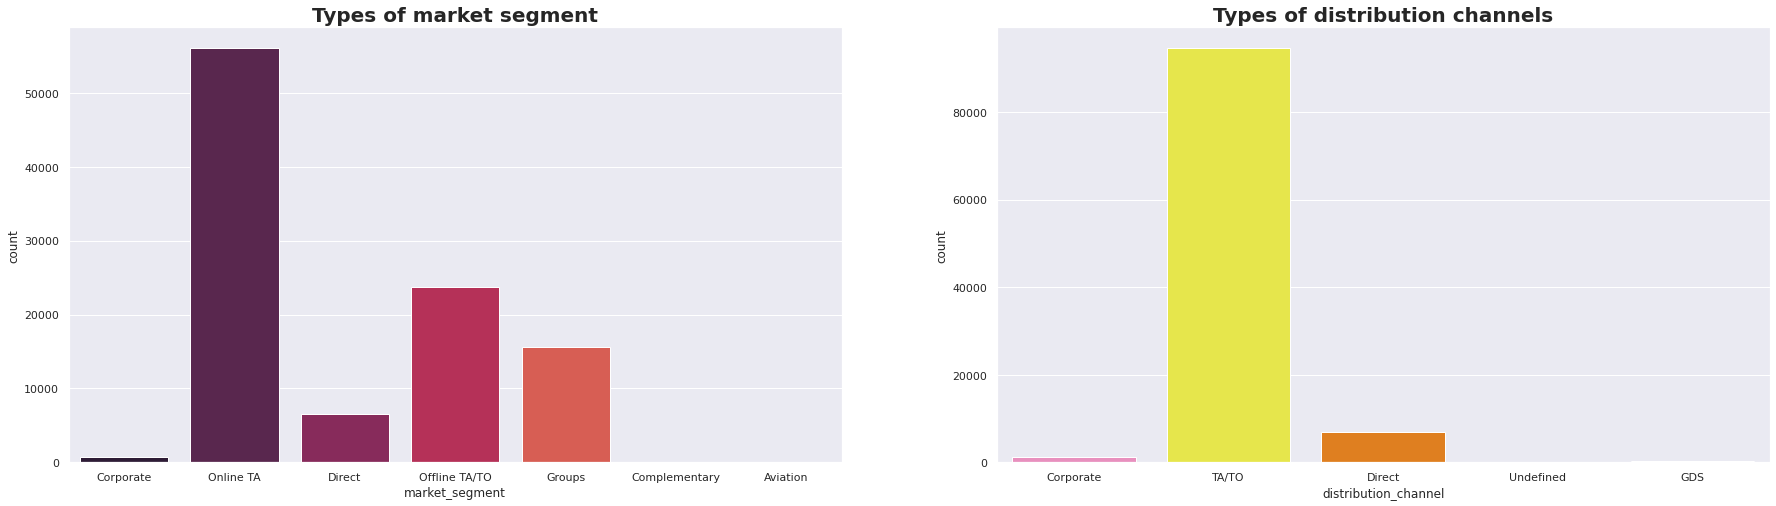

In [70]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='market_segment', data=bookings_df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.countplot(data = bookings_df, x = 'distribution_channel',  palette='Set1_r')
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)


plt.show()

# Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates

#  Which month is the most occupied and which is the least occupied?

In [73]:
#value_counts counts the number of times each values has appeared for example, July appeared in the arrival_date_month column 10.6% times.
bookings_df.arrival_date_month.value_counts(normalize=True) 

August       0.123142
July         0.112591
May          0.097950
June         0.095210
April        0.094754
October      0.091839
September    0.091635
March        0.079015
February     0.062654
December     0.054552
November     0.052385
January      0.044273
Name: arrival_date_month, dtype: float64

Text(0.5, 1.0, 'Types of market segment')

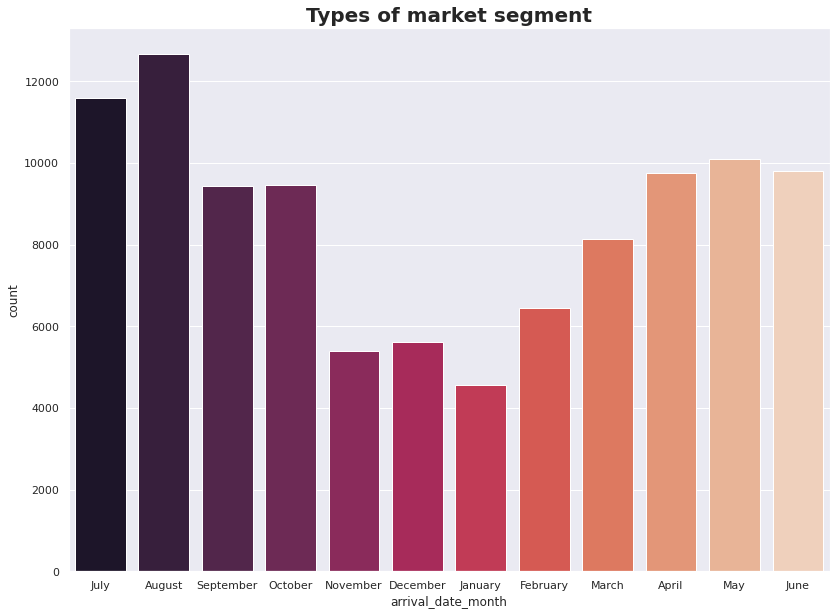

In [78]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
sns.countplot(x='arrival_date_month', data=bookings_df, palette='rocket')
plt.title('Types of market segment',fontweight="bold", size=20)


# August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

# Which months have cheaper booking rates?

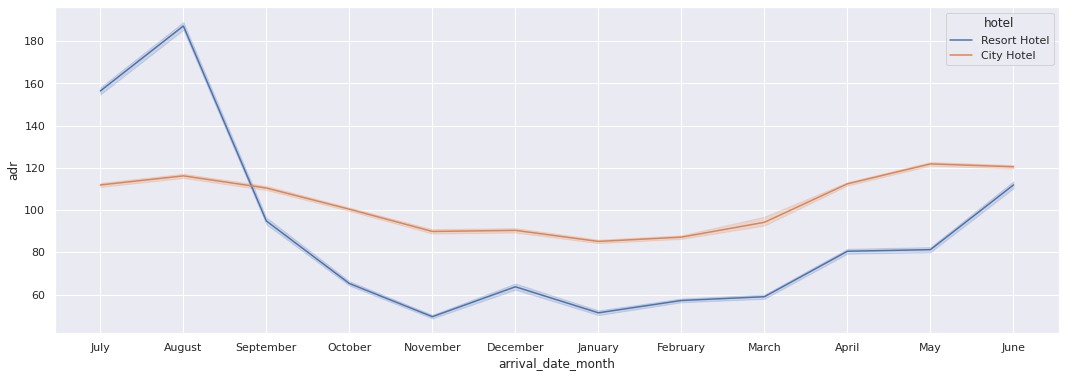

In [79]:
#this is a lineplot of the adr for different hotel types
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= bookings_df)
plt.show()

# For both city and resort hotels, Nov to Jan have cheaper average daily rates

# Number of customers repeated their bookings.

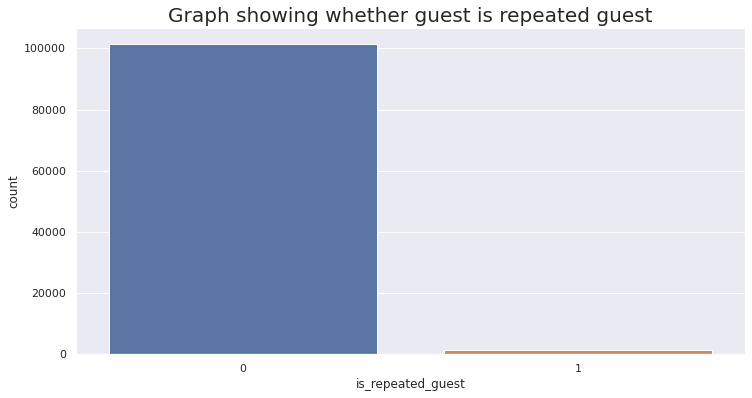

In [89]:
plt.figure(figsize=(12,6))
sns.countplot(data = bookings_df, x = 'is_repeated_guest').set_title('Graph showing whether guest is repeated guest', fontsize = 20)
plt.show()

# Most customers are not repeating their booking.

# Does people with children have a particular preference for the type of hotel?

Text(0.5, 1.0, 'Number of children')

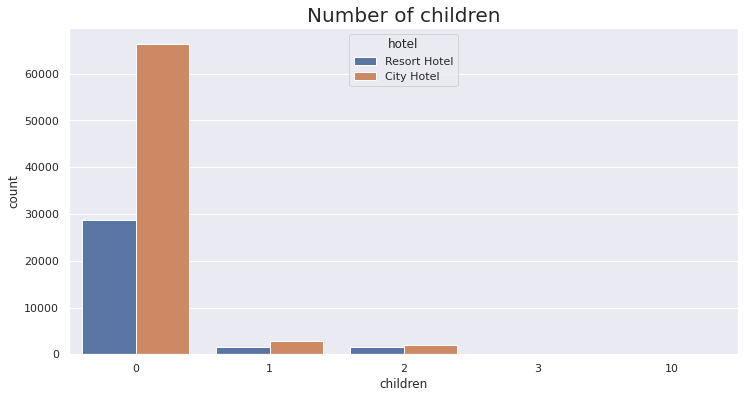

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

# Families with children have no particular preference for the hotel type

## Inferences and Conclusion

- Firstly, higher lead time has higher chance of cancellation. Also, history of previous cancellations increases chances of cancellation.

- Secondly, The City hotel has more guests during spring and autumn, when the prices are also highest, In July and August there are less visitors, although prices are lower. Thus, customers can get good deal on bookings in July and August in city hotel.
- Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest. Thus, these months should be avoided for bookings.

- Thirdly, Broadly, Arpil to August is the peak season of bookings. Both hotels have the fewest guests during the winter.

- Fourthly, No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.

- Fifthly, cancellations are high when done through agents compared to direct bookings. Hotels need to do marketing and give special incentives for direct bookings as these may establish personal one to one relationships promoting customer loyalty.

## Inferences and Conclusion

* Majority of the hotels booked are city hotel. 
* No deposit policies lead to a higher cancellation rates.
* Target months between May to Aug. Those are peak months due to the summer period.
* Majority of the guests are from Western Europe. So target this area for more customers.
* Since there are very few repeated guests, focus should be on retaining the customers after their first visit.